REF:
- articles
    - [1](https://towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72)
    - [2](https://towardsdatascience.com/linear-regression-from-scratch-with-numpy-implementation-finally-8e617d8e274c)
    
- videos
    - [Coding Train](https://www.youtube.com/watch?v=L-Lsfu4ab74)
    - [Linear Regression and Multiple Regression](https://www.youtube.com/watch?v=K_EH2abOp00)
    
    
TODO:
- Gradient Descent
    - [Linear regression gradient descent](https://www.youtube.com/watch?v=WnqQrPNYz5Q)
    

# Linear

Recall that linear regression fits a model in the form:

$$ y=mx+b $$

or 

$$y=a0+a1x1+a2x2+a3x3+...+anxn$$

There are multiple ways of finding these coefficients by let us use **Ordinary Least Mean Square** approach.  The goal is finding a function with coefficients that minimize the error of our model. This line is the best fit that passes through most of the scatter points and also reduces error which is the distance from the point to the line itself.

The total error of the model is the sum of the error of each point

$$\sum_{n}^{i=1}r_i^2$$

where **r** are the distances between the line and the ith point.

The squaring procedure is to remove the ambiguity of the points being above or below the decision line.  We need to minimize the error or distances between the point and the line.

$$\beta_i = \frac{\sum_{i}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i}(x_i-\bar{x})^2} = m$$

This gets the slope of the regression line.  To find the bias you need to place it in equation 1 with x and y being the mean of the data points and solving for the bias.

$$\hat{\beta}_0 = \bar{y} - \bar{\beta}\bar{x}$$
OR
$$bias = \bar{y} - m\bar{x}$$



**In the previous section it was easier to see how the algorithm works each step and how they are calculated.  In this section we will use matrices instead and dot products to make our calculations easier and faster.**

# Imports

In [2]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

# I/O

This dataset is called **Boston house prices dataset** from sklearn.

The information about the dataset can be found [here](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

| Number of Instances | 506 |
|----------------------|---------------------------------------------------------------------------------------|
| Number of Attributes | 13 |


Features
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per 10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in 1000

In [3]:
dataset = load_boston()

# Features of the houses
X = dataset.data
# Price of the houses
y = dataset.target[:,np.newaxis]

print("Total samples in our dataset is: {} and contains {} features".format(X.shape[0],X.shape[1]))
print("X type ={}\ny type = {} ".format(type(X),type(y)))

Total samples in our dataset is: 506 and contains 13 features
X type =<class 'numpy.ndarray'>
y type = <class 'numpy.ndarray'> 


The dataset are numpy arrays so let us treat them that way instead of python lists.

# Main Algo Matrix Approach

In the notes we use the RSS for the computation of residuals.  This makes the derivate calculations a little bit easier to see.  But for the purpose of this demonstration we use the MSE similar to the linear regression example.  We can take this further and also use the coefficient of Determination.  These are just various cost functions to identify the residuals.  Its these residuals we want to minimize using gradient decent.

In [4]:
def compute_cost(X, y, params):
    n_samples = len(y)
    h = X @ params
    return (1/(2*n_samples))*np.sum((h-y)**2)

In [5]:
def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y) 
        J_history[i] = compute_cost(X, y, params)

    return (J_history, params)

In [11]:
# This will be a genera
def calcResiduals(X,y,B,costType='mse'):
    args = {'features':X,'outputs':y,'coefficients':B}
    if costType == 'mse':
        residuals = calcMSE(args)
    else:
        print('So cost type = {}'.format(costType))
        return False
    return residuals

In [13]:
def calcMSE(argsMSE):
    # get variables
    X = argsMSE['features']
    y = argsMSE['outputs']
    B = argsMSE['coefficients']
    
    # by applying the dot product we are essesntially implying regression
    # note that we don't have to add b0 here for the bias like in the previous 
    # example rather we are placing that in the X as its own coloumns
    n = len(y)
    yHat = X.dot(B)
    
    mse = (1/(2*n))*np.sum((y-yHat)**2)
    
    return mse    

In [ ]:
def MYgradient_descent(X, y, B, learning_rate, n_iters,costType='mse'):
    nSamples = len(y)
    Jhistory = np.zeros((n_iters,1))

    for i in range(n_iters):
        B = B - (learning_rate/nSamples) * X.T.dot((X.dot(B) - y)) 
        J_history[i] = calcResiduals(X, y, B,costTypeype)

    return (J_history, params)

In [32]:
def gradientDescent(X, y, B, learning_rate=1, n_iters=1,costType='mse'):    
    nSamples = len(y)
    Jhistory = np.zeros((n_iters,1))
    Jcurrent = 0    
    Jpreviouse = 0
    
    # go through each iteration of gradient decent for a specific number of iterations or until the differences between 
    # each subsequent gradient is small enough to say that it has stablized.
    for i in range(n_iters):
        B = B - (learning_rate/nSamples) * X.T.dot((X.dot(B) - y)) 
        Jhistory[i] = compute_cost(X, y, B)
        if i>1:            
            diff = Jhistory[i]-Jhistory[i-1]
            diff = np.abs(diff)            
            if(diff[0]<0.001):                                 
                print('Found stability at iteration:{}'.format(i))
                break
            else:
                continue

    return (Jhistory, B)

In [35]:
def myGradientDescent(X, y, B, learningRate=1, n_iters=1,costType='mse'):    
    nSamples = len(y)
    Jhistory = np.zeros((n_iters,1))
    Jcurrent = 0    
    Jpreviouse = 0
    
    # go through each iteration of gradient decent for a specific number of iterations or until the differences between 
    # each subsequent gradient is small enough to say that it has stablized.
    for i in range(n_iters):
        # calculate residuals
        e = y-np.dot(X,B)
        # calculate DJ or gradient of the cost function MSE
        DJ = -2/nSamples * np.dot(X.T,e)        
        # update B by taking a step in the negative DJ direction.  Note step here is the learning rate
        B = B - learningRate*DJ
        
        # calculate and store the gradient history               
        #B = B - (learningRate/nSamples) * X.T.dot((X.dot(B) - y)) 
        Jhistory[i] = compute_cost(X, y, B)
        if i>1:            
            diff = Jhistory[i]-Jhistory[i-1]
            diff = np.abs(diff)            
            if(diff[0]<0.001):                                 
                print('Found stability at iteration:{}'.format(i))
                break
            else:
                continue

    return (Jhistory, B)

## Inits

In [9]:
# Get length of data
nSamples  = len(y)

# Get normalization
mu = np.mean(X, 0)
sigma = np.std(X, 0)
X = (X-mu) / sigma 
# You add a coloumn of ones here for the bias term.  
# In the notes this is because it should be a nx(p+1) matrix
X = np.hstack((np.ones((nSamples,1)),X))

# Get number of features
n_features = np.size(X,1)
# intialize the parameters to 0
# these are the coefficients of the model to find
params = np.zeros((n_features,1)) 

In [33]:
n_iters = 1500
learning_rate = 0.01

initial_cost = calcResiduals(X, y, params,costType='mse')

(Jhistory, optimalparams) = gradientDescent(X, y, params, 
                                              learning_rate=0.01, 
                                              n_iters=1000)

Found stability at iteration:528


In [38]:
n_iters = 1500
learning_rate = 0.01

initial_cost = calcResiduals(X, y, params,costType='mse')

(myJhistory, myOptimalParams) = myGradientDescent(X, y, params, 
                                              learningRate=0.01, 
                                              n_iters=1000)

Found stability at iteration:360


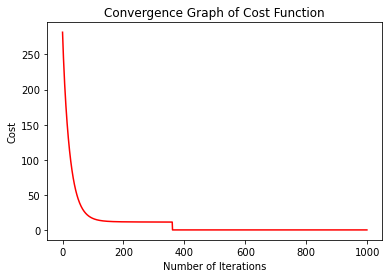

In [39]:
plt.plot(range(len(myJhistory)), myJhistory, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [40]:
print("Initial cost is: ", initial_cost, "\n")

print("Optimal parameters are: \n", myOptimalParams, "\n")

print("Final cost is:{}.  Note that the gradient decent exited at the 528th due to stability of the cost ".format(myJhistory[360]))


Initial cost is:  296.0734584980237 

Optimal parameters are: 
 [[22.51748033]
 [-0.73015917]
 [ 0.70595264]
 [-0.33187158]
 [ 0.75607696]
 [-1.33223785]
 [ 3.00377771]
 [-0.13608087]
 [-2.49080621]
 [ 1.19738595]
 [-0.69184228]
 [-1.90485269]
 [ 0.88784068]
 [-3.57220119]] 

Final cost is:[11.17995531].  Note that the gradient decent exited at the 528th due to stability of the cost 


## Plotting

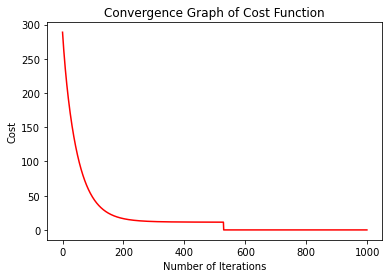

In [24]:
plt.plot(range(len(Jhistory)), Jhistory, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [34]:
print("Initial cost is: ", initial_cost, "\n")

print("Optimal parameters are: \n", optimalparams, "\n")

print("Final cost is:{}.  Note that the gradient decent exited at the 528th due to stability of the cost ".format(Jhistory[528]))


Initial cost is:  296.0734584980237 

Optimal parameters are: 
 [[22.42218643]
 [-0.68527522]
 [ 0.60915784]
 [-0.37457832]
 [ 0.77560015]
 [-1.08946985]
 [ 3.12220715]
 [-0.1536729 ]
 [-2.21480668]
 [ 0.96931228]
 [-0.55580223]
 [-1.85609937]
 [ 0.89441458]
 [-3.47435372]] 

Final cost is:[11.31381349].  Note that the gradient decent exited at the 528th due to stability of the cost 
